学习R语言梯度提升树算法。

# GBM

## 基础使用

In [1]:
library(mlr3verse)
library(tidyverse)

Loading required package: mlr3

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
tsk()

<DictionaryTask> with 22 stored values
Keys: ames_housing, bike_sharing, boston_housing, breast_cancer,
  california_housing, german_credit, ilpd, iris, kc_housing, moneyball,
  mtcars, optdigits, penguins, penguins_simple, pima, ruspini, sonar,
  spam, titanic, usarrests, wine, zoo

In [29]:
# 定义任务
tsk_housing <- tsk("boston_housing")

# 定义学习器
lrn_gbm <- lrn("regr.gbm")

# 训练
lrn_gbm$train(tsk_housing)

# 预测
pred_gbm <- lrn_gbm$predict(tsk_housing )

# 评估
pred_gbm$score(msr("regr.mse"))

Distribution not specified, assuming gaussian ...


regr.mse 
8.917258

In [ ]:
lrn_gbm$param_set

# <ParamSet(12)>
#                    id    class lower upper nlevels        default  value
#                <char>   <char> <num> <num>   <num>         <list> <list>
#  1:      distribution ParamFct    NA    NA       4       gaussian [NULL]
#  2:           n.trees ParamInt     1   Inf     Inf            100 [NULL]
#  3: interaction.depth ParamInt     1   Inf     Inf              1 [NULL]
#  4:    n.minobsinnode ParamInt     1   Inf     Inf             10 [NULL]
#  5:         shrinkage ParamDbl     0   Inf     Inf          0.001 [NULL]
#  6:      bag.fraction ParamDbl     0     1     Inf            0.5 [NULL]
#  7:    train.fraction ParamDbl     0     1     Inf              1 [NULL]
#  8:          cv.folds ParamInt  -Inf   Inf     Inf              0 [NULL]
#  9:         keep.data ParamLgl    NA    NA       2          FALSE  FALSE
# 10:           verbose ParamLgl    NA    NA       2          FALSE [NULL]
# 11:           n.cores ParamInt  -Inf   Inf     Inf              1      1
# 12:      var.monotone ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]

<ParamSet(12)>
                   id    class lower upper nlevels        default  value
               <char>   <char> <num> <num>   <num>         <list> <list>
 1:      distribution ParamFct    NA    NA       4       gaussian [NULL]
 2:           n.trees ParamInt     1   Inf     Inf            100 [NULL]
 3: interaction.depth ParamInt     1   Inf     Inf              1 [NULL]
 4:    n.minobsinnode ParamInt     1   Inf     Inf             10 [NULL]
 5:         shrinkage ParamDbl     0   Inf     Inf          0.001 [NULL]
 6:      bag.fraction ParamDbl     0     1     Inf            0.5 [NULL]
 7:    train.fraction ParamDbl     0     1     Inf              1 [NULL]
 8:          cv.folds ParamInt  -Inf   Inf     Inf              0 [NULL]
 9:         keep.data ParamLgl    NA    NA       2          FALSE  FALSE
10:           verbose ParamLgl    NA    NA       2          FALSE [NULL]
11:           n.cores ParamInt  -Inf   Inf     Inf              1      1
12:      var.monotone ParamUty    NA

## 调参

In [8]:
lts()

<DictionaryTuningSpaces> with 36 stored values
Keys: classif.glmnet.default, classif.glmnet.rbv1, classif.glmnet.rbv2,
  classif.kknn.default, classif.kknn.rbv1, classif.kknn.rbv2,
  classif.ranger.default, classif.ranger.rbv1, classif.ranger.rbv2,
  classif.rpart.default, classif.rpart.rbv1, classif.rpart.rbv2,
  classif.svm.default, classif.svm.rbv1, classif.svm.rbv2,
  classif.xgboost.default, classif.xgboost.rbv1, classif.xgboost.rbv2,
  regr.glmnet.default, regr.glmnet.rbv1, regr.glmnet.rbv2,
  regr.kknn.default, regr.kknn.rbv1, regr.kknn.rbv2,
  regr.ranger.default, regr.ranger.rbv1, regr.ranger.rbv2,
  regr.rpart.default, regr.rpart.rbv1, regr.rpart.rbv2,
  regr.svm.default, regr.svm.rbv1, regr.svm.rbv2, regr.xgboost.default,
  regr.xgboost.rbv1, regr.xgboost.rbv2

In [17]:
# 定义任务
tsk_housing <- tsk("boston_housing")

# 定义学习器
lrn_gbm <- lrn("regr.gbm")

# 定义参数空间
ps_gbm <- ps(
  n.trees = p_int(lower = 1, upper = 1000, default = 100),
  interaction.depth = p_int(lower = 1, upper = 10, default = 1),
  shrinkage = p_dbl(lower = 0.001, upper = 1, default = 0.001)
)

# 定义调优器
tuner_gbm <- tnr("grid_search", resolution = 3)

# 并行化
future::plan("multisession", workers = 4)

# 开始调参
instance <- tune(
  task = tsk_housing,
  learner = lrn_gbm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("regr.mse"),
  tuner = tuner_gbm,
  search_space = ps_gbm
)

INFO  [10:03:52.719] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [10:03:52.726] [bbotk] Evaluating 1 configuration(s)
INFO  [10:03:52.730] [mlr3] Running benchmark with 3 resampling iterations
INFO  [10:03:53.233] [mlr3] Applying learner 'regr.gbm' on task 'boston_housing' (iter 1/3)
Distribution not specified, assuming gaussian ...
INFO  [10:03:53.663] [mlr3] Applying learner 'regr.gbm' on task 'boston_housing' (iter 2/3)
Distribution not specified, assuming gaussian ...
INFO  [10:03:54.069] [mlr3] Applying learner 'regr.gbm' on task 'boston_housing' (iter 3/3)
Distribution not specified, assuming gaussian ...
INFO  [10:03:54.459] [mlr3] Finished benchmark
INFO  [10:03:54.482] [bbotk] Result of batch 1:
INFO  [10:03:54.486] [bbotk]  n.trees interaction.depth shrinkage regr.mse warnings errors runtime_learners
INFO  [10:03:54.486] [bbotk]        1                 1    0.5005 66.36279        0      0            0.034
INFO  [

In [ ]:
instance$result %>% print()

# n.trees interaction.depth shrinkage learner_param_vals  x_domain regr.mse
#      <int>             <int>     <num>             <list>    <list>    <num>
# 1:    1000                10     0.001          <list[5]> <list[3]> 29.91231

   n.trees interaction.depth shrinkage learner_param_vals  x_domain regr.mse
     <int>             <int>     <num>             <list>    <list>    <num>
1:    1000                10     0.001          <list[5]> <list[3]> 29.91231


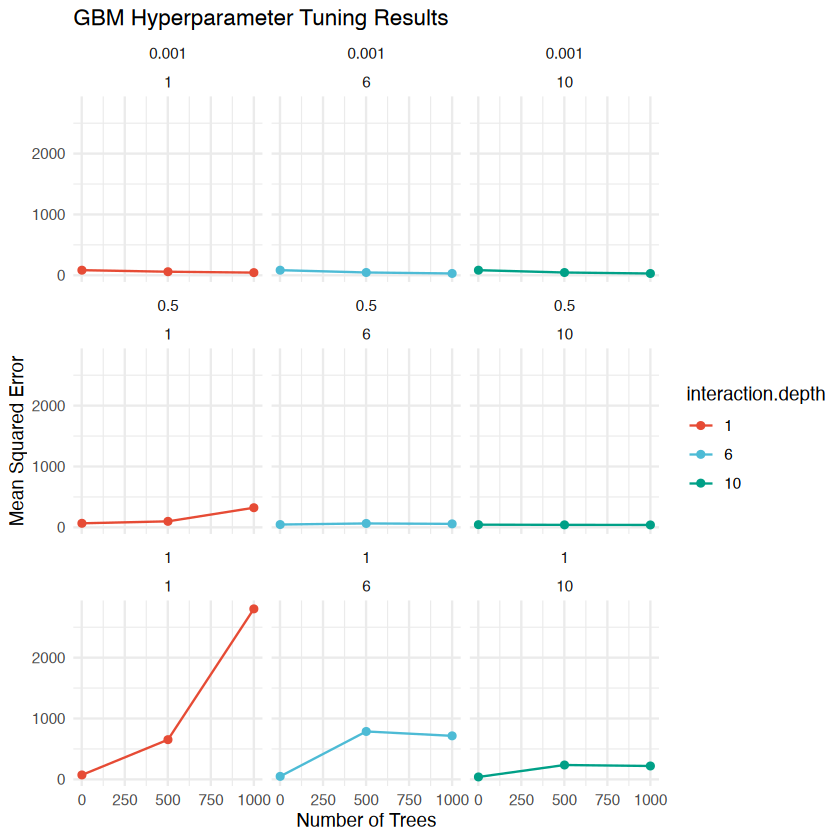

In [22]:
# 提取数据
df <- instance$archive %>%
  as.data.table() %>%
  select(n.trees, interaction.depth, shrinkage, regr.mse) %>%
  mutate(
    across(where(is.numeric), round, 3),
    interaction.depth = as.factor(interaction.depth),
    shrinkage = as.factor(shrinkage)
  )

# 绘制分面折线图
library(ggsci)
ggplot(df, aes(x = n.trees, y = regr.mse, color = interaction.depth)) +
  geom_line() +
  geom_point() +
  facet_wrap(~ shrinkage + interaction.depth) +
  labs(
    title = "GBM Hyperparameter Tuning Results",
    x = "Number of Trees",
    y = "Mean Squared Error"
  ) +
  scale_color_npg() +
  theme_minimal()

In [30]:
# 传入参数
lrn_gbm$param_set$values <- instance$result_learner_param_vals

# 重新训练
lrn_gbm$train(tsk_housing)

# 重新预测
pred_gbm <- lrn_gbm$predict(tsk_housing)

# 重新评估
pred_gbm$score(msr("regr.mse"))

# regr.mse: 19.4035248303668

Distribution not specified, assuming gaussian ...


regr.mse 
19.37538

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


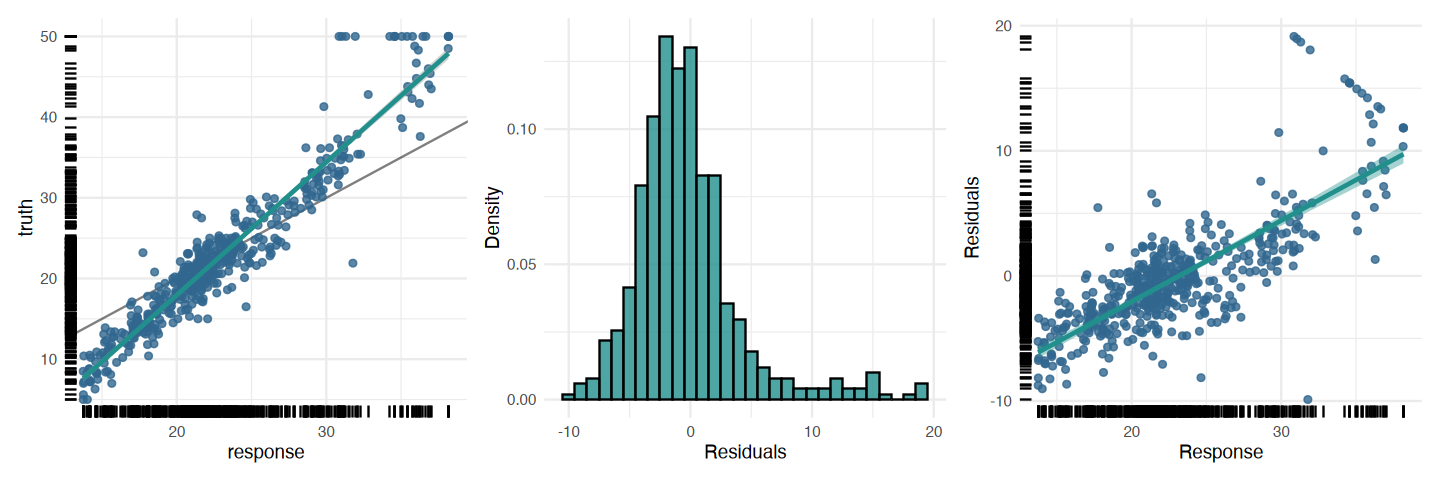

In [25]:
# 绘图
p_xy <- autoplot(pred_gbm, type = "xy")
p_hist <- autoplot(pred_gbm, type = "histogram")
p_res <- autoplot(pred_gbm, type = "residual")

# 修改画布大小
options(repr.plot.width = 12, repr.plot.height = 4)

# 拼图
library(patchwork)
p_xy + p_hist + p_res +
  plot_layout(ncol = 3)

In [ ]:
# 模型可解释性

# GBM分类

In [26]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_gbm <- lrn("classif.gbm")

# 训练
lrn_gbm$train(tsk_german)

# 预测
pred_gbm <- lrn_gbm$predict(tsk_german)

# 评估
pred_gbm$score(msr("classif.acc"))

Distribution not specified, assuming bernoulli ...


classif.acc 
      0.783

In [ ]:
lrn_gbm$param_set

# <ParamSet(12)>
#                    id    class lower upper nlevels        default  value
#                <char>   <char> <num> <num>   <num>         <list> <list>
#  1:      distribution ParamFct    NA    NA       4      bernoulli [NULL]
#  2:           n.trees ParamInt     1   Inf     Inf            100 [NULL]
#  3: interaction.depth ParamInt     1   Inf     Inf              1 [NULL]
#  4:    n.minobsinnode ParamInt     1   Inf     Inf             10 [NULL]
#  5:         shrinkage ParamDbl     0   Inf     Inf          0.001 [NULL]
#  6:      bag.fraction ParamDbl     0     1     Inf            0.5 [NULL]
#  7:    train.fraction ParamDbl     0     1     Inf              1 [NULL]
#  8:          cv.folds ParamInt  -Inf   Inf     Inf              0 [NULL]
#  9:         keep.data ParamLgl    NA    NA       2          FALSE  FALSE
# 10:           verbose ParamLgl    NA    NA       2          FALSE [NULL]
# 11:           n.cores ParamInt  -Inf   Inf     Inf              1      1
# 12:      var.monotone ParamUty    NA    NA     Inf <NoDefault[0]> [NULL]

<ParamSet(12)>
                   id    class lower upper nlevels        default  value
               <char>   <char> <num> <num>   <num>         <list> <list>
 1:      distribution ParamFct    NA    NA       4      bernoulli [NULL]
 2:           n.trees ParamInt     1   Inf     Inf            100 [NULL]
 3: interaction.depth ParamInt     1   Inf     Inf              1 [NULL]
 4:    n.minobsinnode ParamInt     1   Inf     Inf             10 [NULL]
 5:         shrinkage ParamDbl     0   Inf     Inf          0.001 [NULL]
 6:      bag.fraction ParamDbl     0     1     Inf            0.5 [NULL]
 7:    train.fraction ParamDbl     0     1     Inf              1 [NULL]
 8:          cv.folds ParamInt  -Inf   Inf     Inf              0 [NULL]
 9:         keep.data ParamLgl    NA    NA       2          FALSE  FALSE
10:           verbose ParamLgl    NA    NA       2          FALSE [NULL]
11:           n.cores ParamInt  -Inf   Inf     Inf              1      1
12:      var.monotone ParamUty    NA

## 调参

In [ ]:
# 划分数据集
splits <- partition(tsk_german, ratio = 0.7)

# 定义训练集和测试集
tsk_train <- tsk_german$clone()$filter(splits$train)
tsk_test <- tsk_german$clone()$filter(splits$test)

# 定义学习器
lrn_gbm <- lrn("classif.gbm")

# 定义参数空间
ps_gbm <- ps(
  n.trees = p_int(lower = 1, upper = 1000, default = 100),
  interaction.depth = p_int(lower = 1, upper = 10, default = 1),
  shrinkage = p_dbl(lower = 0.001, upper = 1, default = 0.001)
)

# 定义调优器
tuner_gbm <- tnr("grid_search", resolution = 3)

# 并行化
future::plan("multisession", workers = 4)

# 开始调参
instance <- tune(
  task = tsk_train,
  learner = lrn_gbm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  tuner = tuner_gbm,
  search_space = ps_gbm
)

instance$result %>% print()

#    n.trees interaction.depth shrinkage learner_param_vals  x_domain classif.acc
#      <int>             <int>     <num>             <list>    <list>       <num>
# 1:     501                 6    0.5005          <list[5]> <list[3]>   0.7457051

INFO  [10:23:09.074] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [10:23:09.085] [bbotk] Evaluating 1 configuration(s)
INFO  [10:23:09.090] [mlr3] Running benchmark with 3 resampling iterations
INFO  [10:23:09.180] [mlr3] Applying learner 'classif.gbm' on task 'german_credit' (iter 1/3)
Distribution not specified, assuming bernoulli ...
INFO  [10:23:09.306] [mlr3] Applying learner 'classif.gbm' on task 'german_credit' (iter 2/3)
Distribution not specified, assuming bernoulli ...
INFO  [10:23:09.405] [mlr3] Applying learner 'classif.gbm' on task 'german_credit' (iter 3/3)
Distribution not specified, assuming bernoulli ...
INFO  [10:23:09.516] [mlr3] Finished benchmark
INFO  [10:23:09.553] [bbotk] Result of batch 1:
INFO  [10:23:09.555] [bbotk]  n.trees interaction.depth shrinkage classif.acc warnings errors
INFO  [10:23:09.555] [bbotk]     1000                 1     0.001   0.7114254        0      0
INFO  [10:23:09.555] [bbot

In [ ]:
# 定义学习器
lrn_gbm <- lrn("classif.gbm", predict_type = "prob")

# 传入参数
lrn_gbm$param_set$values <- instance$result_learner_param_vals

# 重新训练
lrn_gbm$train(tsk_train)

# 重新预测
pred_gbm <- lrn_gbm$predict(tsk_test)

# 重新评估
pred_gbm$score(msr("classif.acc"))

# classif.acc: 0.723333333333333

Distribution not specified, assuming bernoulli ...


classif.acc 
  0.7233333

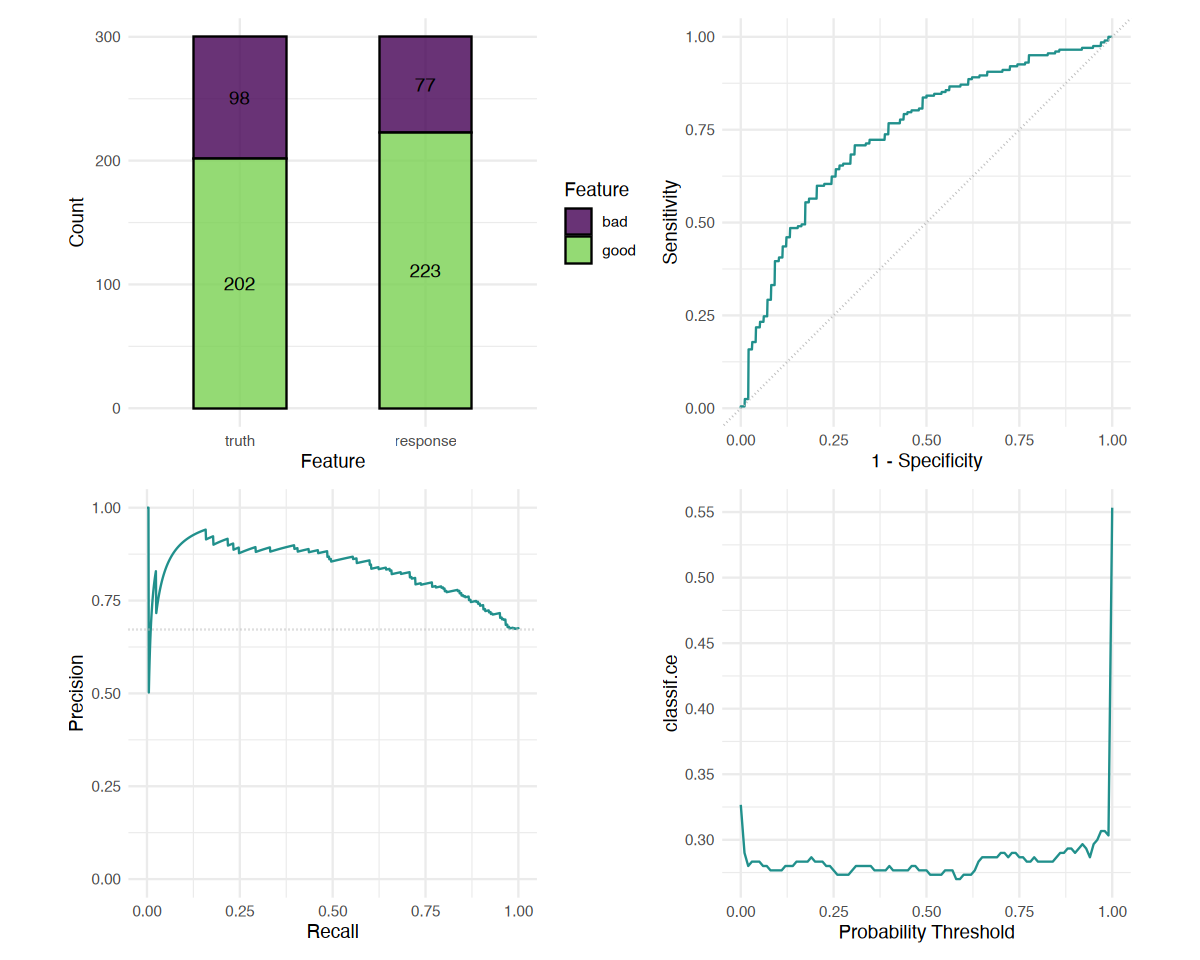

In [39]:
# 画图
p_stack <- autoplot(pred_gbm, type = "stacked")
p_roc <- autoplot(pred_gbm, type = "roc")
p_prc <- autoplot(pred_gbm, type = "prc")
p_thres <- autoplot(pred_gbm, type = "threshold")

# 修改画布大小
options(repr.plot.width = 10, repr.plot.height = 8)

# 拼图
library(patchwork)
p_stack + p_roc + p_prc + p_thres +
  plot_layout(ncol = 2)

## 模型可解释性

In [41]:
# 提取数据
credit_x <- tsk_test$data(cols = tsk_test$feature_names)
credit_y <- tsk_test$data(cols = tsk_test$target_names)

# 创建对象
library(DALEX)
library(DALEXtra)

gbm_exp <- DALEXtra::explain_mlr3(
  lrn_gbm,
  data = credit_x,
  y = as.numeric(credit_y$credit_risk == "bad"),
  label = "GBM Credit",
  colorize = FALSE
)

gbm_exp

Welcome to DALEX (version: 2.4.3).
Find examples and detailed introduction at: http://ema.drwhy.ai/



Attaching package: 'DALEX'


The following object is masked from 'package:dplyr':

    explain




Preparation of a new explainer is initiated
  -> model label       :  GBM Credit 
  -> data              :  300  rows  20  cols 
  -> target variable   :  300  values 
  -> predict function  :  yhat.LearnerClassif  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr3 , ver. 0.23.0 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  2.442491e-15 , mean =  0.2665644 , max =  1  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.9999999 , mean =  0.06010228 , max =  1  
  A new explainer has been created!  


Model label:  GBM Credit 
Model class:  LearnerClassifGBM,LearnerClassif,Learner,R6 
Data head  :
     age amount                              credit_history duration
   <int>  <int>                                      <fctr>    <int>
1:    67   1169     all credits at this bank paid back duly        6
2:    22   5951 no credits taken/all credits paid back duly       48
   employment_duration foreign_worker housing installment_rate
                <fctr>         <fctr>  <fctr>            <ord>
1:            >= 7 yrs             no    rent             < 20
2:    1 <= ... < 4 yrs             no    rent   25 <= ... < 35
                         job number_credits other_debtors
                      <fctr>          <ord>        <fctr>
1: skilled employee/official            2-3          none
2: skilled employee/official              1          none
   other_installment_plans people_liable                  personal_status_sex
                    <fctr>        <fctr>                        

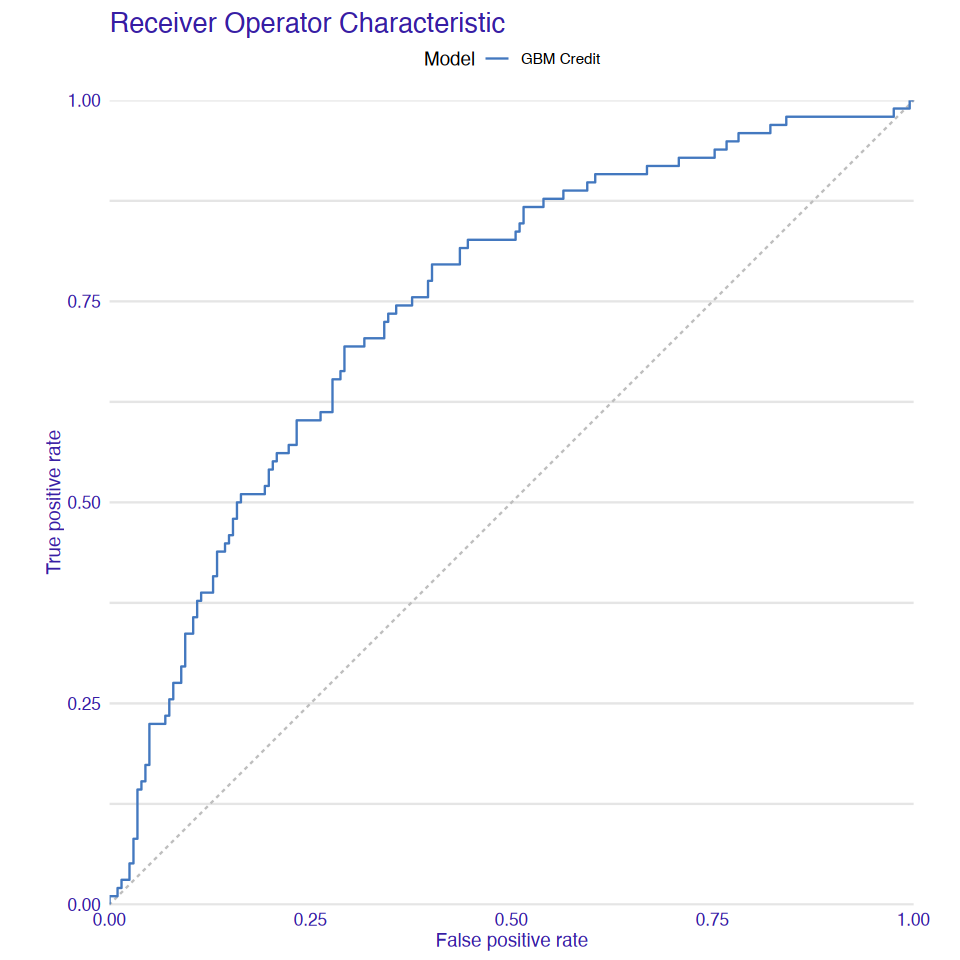

In [45]:
perf_credit <- model_performance(gbm_exp)

# 修改画布大小
options(repr.plot.width = 8, repr.plot.height = 8)
plot(perf_credit, geom = "roc")

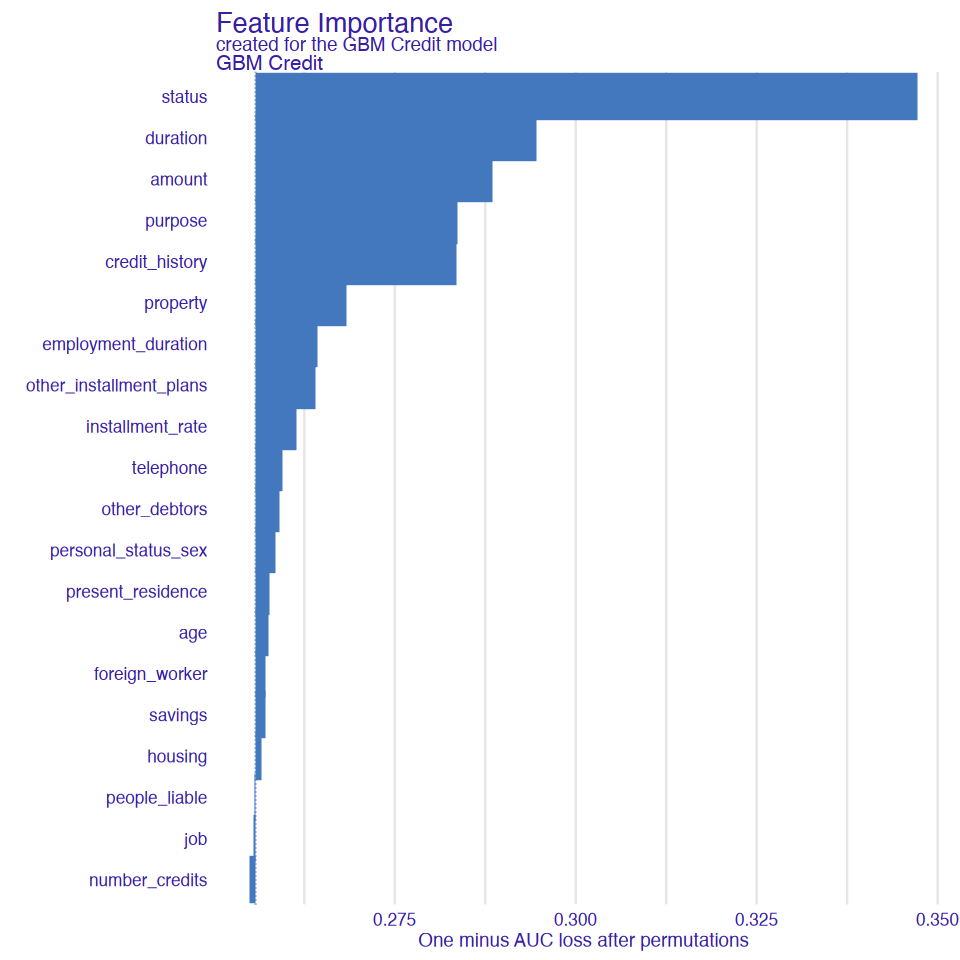

In [46]:
gbm_effect <- model_parts(gbm_exp)
plot(gbm_effect, show_boxplots = FALSE)

Warning message in FUN(X[[i]], ...):
"Variable: < amount > has more than 201 unique values and all of them will be used as variable splits in calculating variable profiles. Use the `variable_splits` parameter to mannualy change this behaviour. If you believe this warning to be a false positive, raise issue at <https://github.com/ModelOriented/ingredients/issues>."


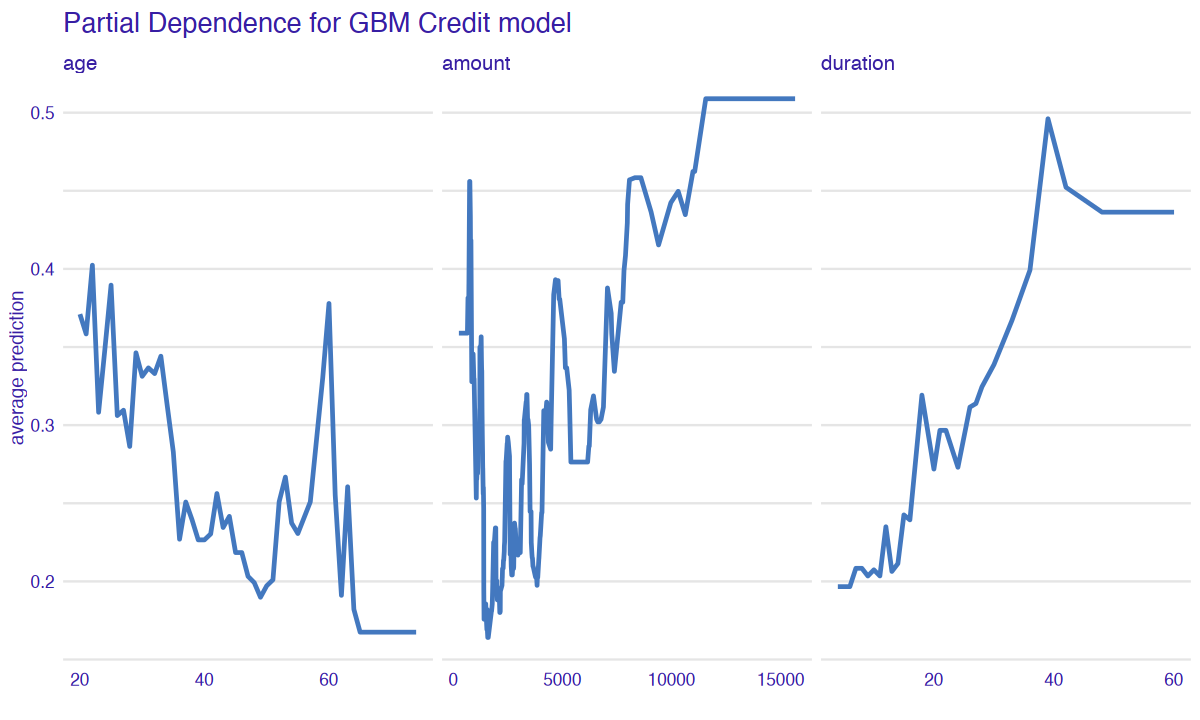

In [49]:
gbm_profiles <- model_profile(gbm_exp)

# 修改画布大小
options(repr.plot.width = 10, repr.plot.height = 6)
plot(gbm_profiles) +
  theme(legend.position = "top") +
  ggtitle("Partial Dependence for GBM Credit model", "")

# XGBoost

# 基本使用

In [51]:
# 定义任务
tsk_housing <- tsk("boston_housing")

# 定义学习器
lrn_xgboost <- as_learner(
  po("encode") %>>%
    lrn("regr.xgboost", id = "xgboost")
)

# 训练
lrn_xgboost$train(tsk_housing)

# 预测
pred_xgboost <- lrn_xgboost$predict(tsk_housing)

# 评估
pred_xgboost$score(msr("regr.mse"))

regr.mse 
1.328139e-06

## 调参

In [ ]:
lrn_xgboost$pipeops$xgboost$param_set %>%
  as.data.table() %>%
  select(id, class, lower, upper, default) %>%
  print()

# id    class lower upper          default
#                          <char>   <char> <num> <num>           <list>
#  1:                       alpha ParamDbl     0   Inf                0
#  2:               approxcontrib ParamLgl    NA    NA            FALSE
#  3:                  base_score ParamDbl  -Inf   Inf              0.5
#  4:                     booster ParamFct    NA    NA           gbtree
#  5:                   callbacks ParamUty    NA    NA        <list[0]>
#  6:           colsample_bylevel ParamDbl     0     1                1
#  7:            colsample_bynode ParamDbl     0     1                1
#  8:            colsample_bytree ParamDbl     0     1                1
#  9:                      device ParamUty    NA    NA              cpu
# 10: disable_default_eval_metric ParamLgl    NA    NA            FALSE
# 11:       early_stopping_rounds ParamInt     1   Inf           [NULL]
# 12:                         eta ParamDbl     0     1              0.3
# 13:                 eval_metric ParamUty    NA    NA             rmse
# 14:            feature_selector ParamFct    NA    NA           cyclic
# 15:                       gamma ParamDbl     0   Inf                0
# 16:                 grow_policy ParamFct    NA    NA        depthwise
# 17:     interaction_constraints ParamUty    NA    NA   <NoDefault[0]>
# 18:              iterationrange ParamUty    NA    NA   <NoDefault[0]>
# 19:                      lambda ParamDbl     0   Inf                1
# 20:                 lambda_bias ParamDbl     0   Inf                0
# 21:                     max_bin ParamInt     2   Inf              256
# 22:              max_delta_step ParamDbl     0   Inf                0
# 23:                   max_depth ParamInt     0   Inf                6
# 24:                  max_leaves ParamInt     0   Inf                0
# 25:                    maximize ParamLgl    NA    NA           [NULL]
# 26:            min_child_weight ParamDbl     0   Inf                1
# 27:                     missing ParamDbl  -Inf   Inf               NA
# 28:        monotone_constraints ParamUty    NA    NA                0
# 29:              normalize_type ParamFct    NA    NA             tree
# 30:                     nrounds ParamInt     1   Inf   <NoDefault[0]>
# 31:                     nthread ParamInt     1   Inf                1
# 32:                  ntreelimit ParamInt     1   Inf           [NULL]
# 33:           num_parallel_tree ParamInt     1   Inf                1
# 34:                   objective ParamUty    NA    NA reg:squarederror
# 35:                    one_drop ParamLgl    NA    NA            FALSE
# 36:                outputmargin ParamLgl    NA    NA            FALSE
# 37:                 predcontrib ParamLgl    NA    NA            FALSE
# 38:             predinteraction ParamLgl    NA    NA            FALSE
# 39:                    predleaf ParamLgl    NA    NA            FALSE
# 40:               print_every_n ParamInt     1   Inf                1
# 41:                process_type ParamFct    NA    NA          default
# 42:                   rate_drop ParamDbl     0     1                0
# 43:                refresh_leaf ParamLgl    NA    NA             TRUE
# 44:                     reshape ParamLgl    NA    NA            FALSE
# 45:             sampling_method ParamFct    NA    NA          uniform
# 46:                 sample_type ParamFct    NA    NA          uniform
# 47:                   save_name ParamUty    NA    NA           [NULL]
# 48:                 save_period ParamInt     0   Inf           [NULL]
# 49:            scale_pos_weight ParamDbl  -Inf   Inf                1
# 50:          seed_per_iteration ParamLgl    NA    NA            FALSE
# 51:                   skip_drop ParamDbl     0     1                0
# 52:                strict_shape ParamLgl    NA    NA            FALSE
# 53:                   subsample ParamDbl     0     1                1
# 54:                       top_k ParamInt     0   Inf                0
# 55:                    training ParamLgl    NA    NA            FALSE
# 56:                 tree_method ParamFct    NA    NA             auto
# 57:      tweedie_variance_power ParamDbl     1     2              1.5
# 58:                     updater ParamUty    NA    NA   <NoDefault[0]>
# 59:                     verbose ParamInt     0     2                1
# 60:                   watchlist ParamUty    NA    NA           [NULL]
# 61:                   xgb_model ParamUty    NA    NA           [NULL]
#                              id    class lower upper          default

                             id    class lower upper          default
                         <char>   <char> <num> <num>           <list>
 1:                       alpha ParamDbl     0   Inf                0
 2:               approxcontrib ParamLgl    NA    NA            FALSE
 3:                  base_score ParamDbl  -Inf   Inf              0.5
 4:                     booster ParamFct    NA    NA           gbtree
 5:                   callbacks ParamUty    NA    NA        <list[0]>
 6:           colsample_bylevel ParamDbl     0     1                1
 7:            colsample_bynode ParamDbl     0     1                1
 8:            colsample_bytree ParamDbl     0     1                1
 9:                      device ParamUty    NA    NA              cpu
10: disable_default_eval_metric ParamLgl    NA    NA            FALSE
11:       early_stopping_rounds ParamInt     1   Inf           [NULL]
12:                         eta ParamDbl     0     1              0.3
13:                 

In [ ]:
# 查看默认参数空间
lts() %>%
  as.data.table() %>%
  select(key, label) %>%
  filter(str_detect(key, "xgboost")) %>%
  print()

# Key: <key>
#                        key                                 label
#                     <char>                                <char>
# 1: classif.xgboost.default   Classification XGBoost with Default
# 2:    classif.xgboost.rbv1 Classification XGBoost with RandomBot
# 3:    classif.xgboost.rbv2 Classification XGBoost with RandomBot
# 4:    regr.xgboost.default       Regression XGBoost with Default
# 5:       regr.xgboost.rbv1     Regression XGBoost with RandomBot
# 6:       regr.xgboost.rbv2     Regression XGBoost with RandomBot

Key: <key>
                       key                                 label
                    <char>                                <char>
1: classif.xgboost.default   Classification XGBoost with Default
2:    classif.xgboost.rbv1 Classification XGBoost with RandomBot
3:    classif.xgboost.rbv2 Classification XGBoost with RandomBot
4:    regr.xgboost.default       Regression XGBoost with Default
5:       regr.xgboost.rbv1     Regression XGBoost with RandomBot
6:       regr.xgboost.rbv2     Regression XGBoost with RandomBot


In [ ]:
ps_xgboost <- lts("regr.xgboost.default")
ps_xgboost

# <TuningSpace:regr.xgboost.default>: Regression XGBoost with Default
#                   id lower upper levels logscale
#               <char> <num> <num> <list>   <lgcl>
# 1:               eta 1e-04     1 [NULL]     TRUE
# 2:           nrounds 1e+00  5000 [NULL]    FALSE
# 3:         max_depth 1e+00    20 [NULL]    FALSE
# 4:  colsample_bytree 1e-01     1 [NULL]    FALSE
# 5: colsample_bylevel 1e-01     1 [NULL]    FALSE
# 6:            lambda 1e-03  1000 [NULL]     TRUE
# 7:             alpha 1e-03  1000 [NULL]     TRUE
# 8:         subsample 1e-01     1 [NULL]    FALSE

<TuningSpace:regr.xgboost.default>: Regression XGBoost with Default
                  id lower upper levels logscale
              <char> <num> <num> <list>   <lgcl>
1:               eta 1e-04     1 [NULL]     TRUE
2:           nrounds 1e+00  5000 [NULL]    FALSE
3:         max_depth 1e+00    20 [NULL]    FALSE
4:  colsample_bytree 1e-01     1 [NULL]    FALSE
5: colsample_bylevel 1e-01     1 [NULL]    FALSE
6:            lambda 1e-03  1000 [NULL]     TRUE
7:             alpha 1e-03  1000 [NULL]     TRUE
8:         subsample 1e-01     1 [NULL]    FALSE

In [65]:
# 定义hyperband调优器
tuner <- tnr("hyperband", eta = 2, repetitions = 1)

# 定义任务
tsk_housing <- tsk("boston_housing")

# 定义学习器
lrn_xgboost <- as_learner(
  po("encode") %>>%
    lrn("regr.xgboost", id = "xgboost")
)

# 定义参数空间
ps_xgboost <- ps(
  xgboost.eta = p_dbl(lower = 1e-4, upper = 1, logscale = TRUE),
  # 标记Hyperband的budget参数
  xgboost.nrounds = p_int(lower = 1, upper = 5000, tags = "budget"),
  xgboost.max_depth = p_int(lower = 1, upper = 20),
  xgboost.colsample_bytree = p_dbl(lower = 0.1, upper = 1),
  xgboost.colsample_bylevel = p_dbl(lower = 0.1, upper = 1),
  xgboost.lambda = p_dbl(lower = 1e-3, upper = 1000, logscale = TRUE),
  xgboost.alpha = p_dbl(lower = 1e-3, upper = 1000, logscale = TRUE),
  xgboost.subsample = p_dbl(lower = 0.1, upper = 1)
)

# 并行化
future::plan("multisession", workers = 4)

# 开始调参
instance <- tune(
  task = tsk_housing,
  learner = lrn_xgboost,
  resampling = rsmp("cv", folds = 3),
  measure = msr("regr.mse"),
  tuner = tuner,
  search_space = ps_xgboost
)

In [66]:
# 划分数据集
splits <- partition(tsk_housing, ratio = 0.7)

# 定义训练集和测试集
tsk_train <- tsk_housing$clone()$filter(splits$train)
tsk_test <- tsk_housing$clone()$filter(splits$test)

# 定义学习器
lrn_xgboost <- as_learner(
  po("encode") %>>%
    lrn("regr.xgboost", id = "xgboost")
)

# 训练
lrn_xgboost$train(tsk_train)

# 预测
pred_xgboost <- lrn_xgboost$predict(tsk_test)

# 评估
pred_xgboost$score(msr("regr.mse"))

regr.mse 
14.27894

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


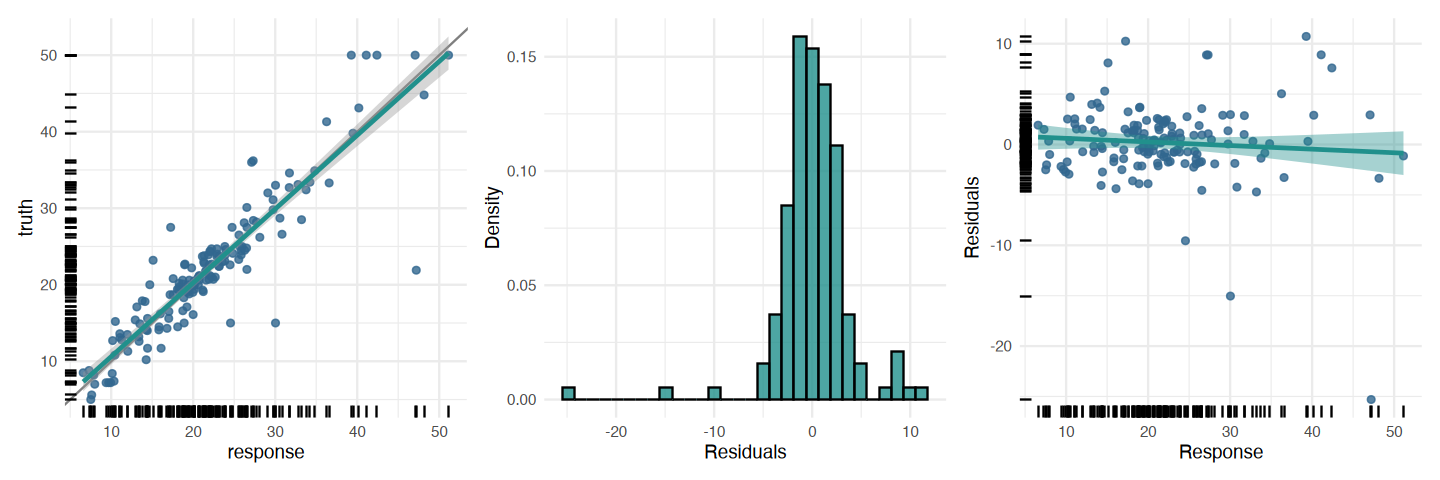

In [67]:
# 画图
p_xy <- autoplot(pred_xgboost, type = "xy")
p_hist <- autoplot(pred_xgboost, type = "histogram")
p_res <- autoplot(pred_xgboost, type = "residual")

# 修改画布大小
options(repr.plot.width = 12, repr.plot.height = 4)

# 拼图
library(patchwork)
p_xy + p_hist + p_res +
  plot_layout(ncol = 3)

## 模型解释性

In [70]:
# 创建Prediction对象
library(iml)

housing_x <- tsk_train$data(cols = tsk_train$feature_names)
housing_y <- tsk_train$data(cols = tsk_train$target_names)

predictor <- Predictor$new(
  model = lrn_xgboost,
  data = housing_x,
  y = housing_y
)

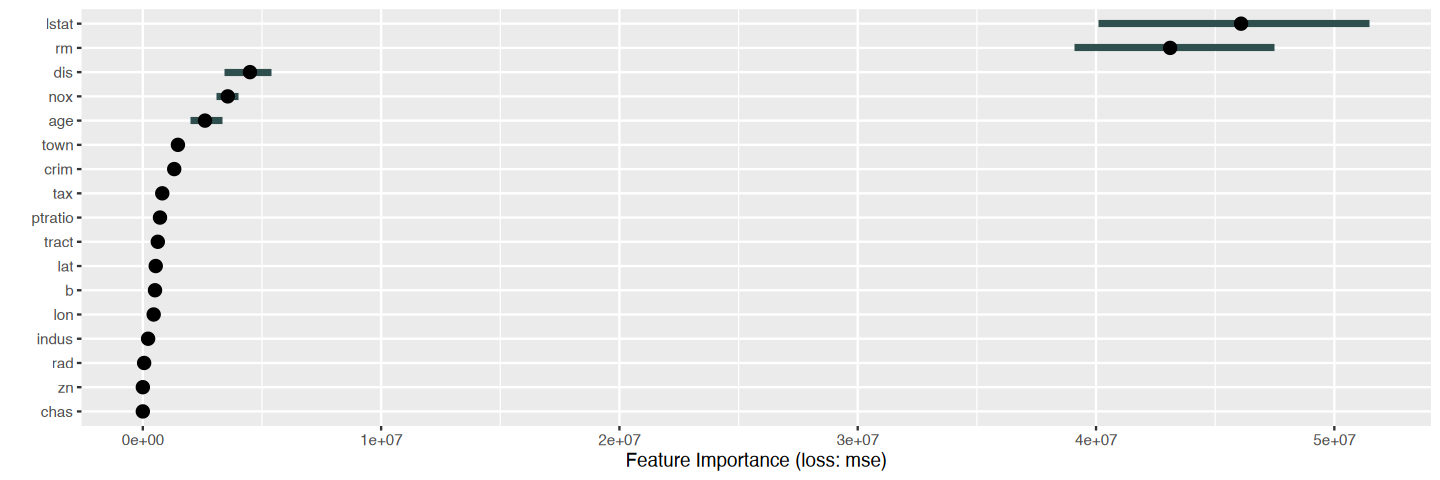

In [71]:
importance <- FeatureImp$new(
  predictor,
  loss = "mse",
  n.repetitions = 100
)
importance$plot()

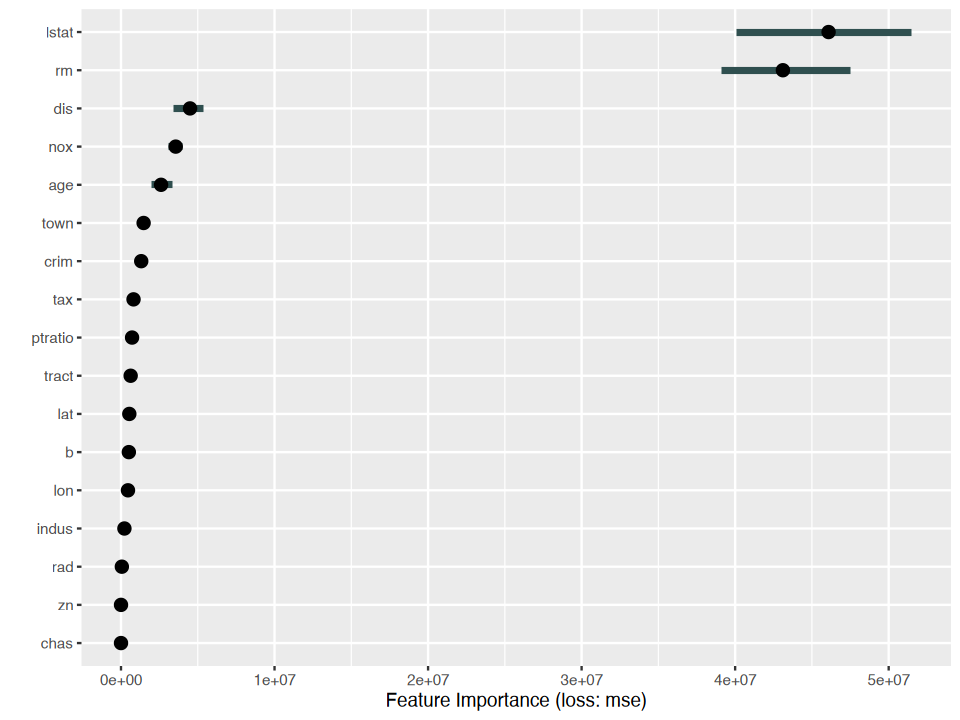

In [72]:
# 调整画布大小
options(repr.plot.width = 8, repr.plot.height = 6)

importance$plot()

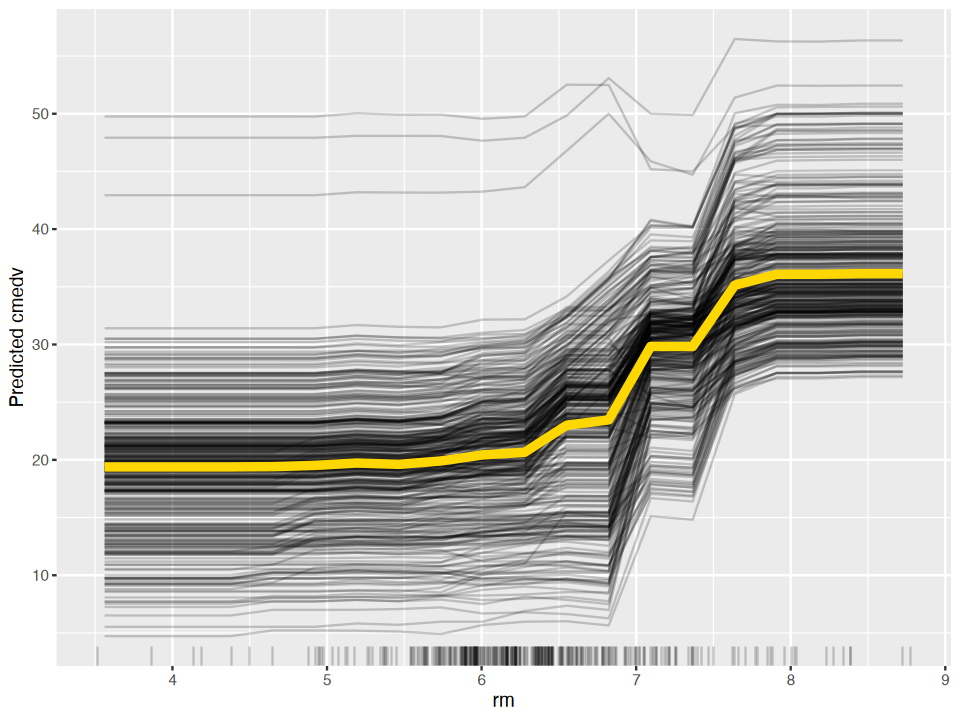

In [73]:
# 绘制ICE+PD图
ice <- FeatureEffect$new(
  predictor,
  feature = "rm",
  method = "pdp+ice"
)
ice$plot()

# LightGBM

In [75]:
# 定义任务
tsk_germna <- tsk("german_credit")

# 定义学习器
lrn_lightgbm <- as_learner(
  po(
    "encode",
    method = "poly",
    affect_columns = selector_type("ordered")
  ) %>>%
    lrn("classif.lightgbm", id = "lightgbm", predict_type = "prob")
)

# 训练
lrn_lightgbm$train(tsk_germna)

# 预测
pred_lightgbm <- lrn_lightgbm$predict(tsk_germna)

# 评估
pred_lightgbm$score(msr("classif.acc"))

classif.acc 
          1

In [ ]:
lrn_lightgbm$pipeops$lightgbm$param_set %>%
  as.data.table() %>%
  select(id, class, lower, upper, default) %>%
  as.data.frame() %>%
  print()

# id    class lower  upper       default
# 1                      objective ParamFct    NA     NA          NULL
# 2                           eval ParamUty    NA     NA          NULL
# 3                        verbose ParamInt  -Inf    Inf             1
# 4                         record ParamLgl    NA     NA          TRUE
# 5                      eval_freq ParamInt     1    Inf             1
# 6                      callbacks ParamUty    NA     NA          NULL
# 7                     reset_data ParamLgl    NA     NA         FALSE
# 8                       boosting ParamFct    NA     NA          gbdt
# 9                    linear_tree ParamLgl    NA     NA         FALSE
# 10                 learning_rate ParamDbl     0    Inf           0.1
# 11                    num_leaves ParamInt     1 131072            31
# 12                  tree_learner ParamFct    NA     NA        serial
# 13                   num_threads ParamInt     0    Inf             0
# 14                   device_type ParamFct    NA     NA           cpu
# 15                          seed ParamInt  -Inf    Inf          NULL
# 16                 deterministic ParamLgl    NA     NA         FALSE
# 17          data_sample_strategy ParamFct    NA     NA       bagging
# 18                force_col_wise ParamLgl    NA     NA         FALSE
# 19                force_row_wise ParamLgl    NA     NA         FALSE
# 20           histogram_pool_size ParamDbl  -Inf    Inf            -1
# 21                     max_depth ParamInt  -Inf    Inf            -1
# 22              min_data_in_leaf ParamInt     0    Inf            20
# 23       min_sum_hessian_in_leaf ParamDbl     0    Inf         0.001
# 24              bagging_fraction ParamDbl     0      1             1
# 25          pos_bagging_fraction ParamDbl     0      1             1
# 26          neg_bagging_fraction ParamDbl     0      1             1
# 27                  bagging_freq ParamInt     0    Inf             0
# 28                  bagging_seed ParamInt  -Inf    Inf             3
# 29              bagging_by_query ParamLgl    NA     NA         FALSE
# 30              feature_fraction ParamDbl     0      1             1
# 31       feature_fraction_bynode ParamDbl     0      1             1
# 32         feature_fraction_seed ParamInt  -Inf    Inf             2
# 33                   extra_trees ParamLgl    NA     NA         FALSE
# 34                    extra_seed ParamInt  -Inf    Inf             6
# 35                max_delta_step ParamDbl  -Inf    Inf             0
# 36                     lambda_l1 ParamDbl     0    Inf             0
# 37                     lambda_l2 ParamDbl     0    Inf             0
# 38                 linear_lambda ParamDbl     0    Inf             0
# 39             min_gain_to_split ParamDbl     0    Inf             0
# 40                     drop_rate ParamDbl     0      1           0.1
# 41                      max_drop ParamInt  -Inf    Inf            50
# 42                     skip_drop ParamDbl     0      1           0.5
# 43             xgboost_dart_mode ParamLgl    NA     NA         FALSE
# 44                  uniform_drop ParamLgl    NA     NA         FALSE
# 45                     drop_seed ParamInt  -Inf    Inf             4
# 46                      top_rate ParamDbl     0      1           0.2
# 47                    other_rate ParamDbl     0      1           0.1
# 48            min_data_per_group ParamInt     1    Inf           100
# 49             max_cat_threshold ParamInt     1    Inf            32
# 50                        cat_l2 ParamDbl     0    Inf            10
# 51                    cat_smooth ParamDbl     0    Inf            10
# 52             max_cat_to_onehot ParamInt     1    Inf             4
# 53                         top_k ParamInt     1    Inf            20
# 54          monotone_constraints ParamUty    NA     NA          NULL
# 55   monotone_constraints_method ParamFct    NA     NA         basic
# 56              monotone_penalty ParamDbl     0    Inf             0
# 57                feature_contri ParamUty    NA     NA          NULL
# 58         forcedsplits_filename ParamUty    NA     NA              
# 59              refit_decay_rate ParamDbl     0      1           0.9
# 60                 cegb_tradeoff ParamDbl     0    Inf             1
# 61            cegb_penalty_split ParamDbl     0    Inf             0
# 62     cegb_penalty_feature_lazy ParamUty    NA     NA          NULL
# 63  cegb_penalty_feature_coupled ParamUty    NA     NA          NULL
# 64                   path_smooth ParamDbl     0    Inf             0
# 65       interaction_constraints ParamUty    NA     NA          NULL
# 66            use_quantized_grad ParamLgl    NA     NA          TRUE
# 67           num_grad_quant_bins ParamInt  -Inf    Inf             4
# 68        quant_train_renew_leaf ParamLgl    NA     NA         FALSE
# 69           stochastic_rounding ParamLgl    NA     NA          TRUE
# 70                  serializable ParamLgl    NA     NA          TRUE
# 71                       max_bin ParamInt     2    Inf           255
# 72            max_bin_by_feature ParamUty    NA     NA          NULL
# 73               min_data_in_bin ParamInt     1    Inf             3
# 74      bin_construct_sample_cnt ParamInt     1    Inf        200000
# 75              data_random_seed ParamInt  -Inf    Inf             1
# 76              is_enable_sparse ParamLgl    NA     NA          TRUE
# 77                 enable_bundle ParamLgl    NA     NA          TRUE
# 78                   use_missing ParamLgl    NA     NA          TRUE
# 79               zero_as_missing ParamLgl    NA     NA         FALSE
# 80            feature_pre_filter ParamLgl    NA     NA          TRUE
# 81                 pre_partition ParamLgl    NA     NA         FALSE
# 82                     two_round ParamLgl    NA     NA         FALSE
# 83           forcedbins_filename ParamUty    NA     NA              
# 84                  is_unbalance ParamLgl    NA     NA         FALSE
# 85              scale_pos_weight ParamDbl     0    Inf             1
# 86                       sigmoid ParamDbl     0    Inf             1
# 87            boost_from_average ParamLgl    NA     NA          TRUE
# 88                       eval_at ParamUty    NA     NA 1, 2, 3, 4, 5
# 89             multi_error_top_k ParamInt     1    Inf             1
# 90                auc_mu_weights ParamUty    NA     NA          NULL
# 91                  num_machines ParamInt     1    Inf             1
# 92             local_listen_port ParamInt     1    Inf         12400
# 93                      time_out ParamInt     1    Inf           120
# 94                      machines ParamUty    NA     NA              
# 95               gpu_platform_id ParamInt  -Inf    Inf            -1
# 96                 gpu_device_id ParamInt  -Inf    Inf            -1
# 97                    gpu_use_dp ParamLgl    NA     NA         FALSE
# 98                       num_gpu ParamInt     1    Inf             1
# 99       start_iteration_predict ParamInt  -Inf    Inf             0
# 100        num_iteration_predict ParamInt  -Inf    Inf            -1
# 101              pred_early_stop ParamLgl    NA     NA         FALSE
# 102         pred_early_stop_freq ParamInt  -Inf    Inf            10
# 103       pred_early_stop_margin ParamDbl  -Inf    Inf            10
# 104               num_iterations ParamInt     1    Inf           100
# 105        early_stopping_rounds ParamInt     1    Inf          NULL
# 106     early_stopping_min_delta ParamDbl     0    Inf          NULL
# 107            first_metric_only ParamLgl    NA     NA         FALSE

                              id    class lower  upper       default
1                      objective ParamFct    NA     NA          NULL
2                           eval ParamUty    NA     NA          NULL
3                        verbose ParamInt  -Inf    Inf             1
4                         record ParamLgl    NA     NA          TRUE
5                      eval_freq ParamInt     1    Inf             1
6                      callbacks ParamUty    NA     NA          NULL
7                     reset_data ParamLgl    NA     NA         FALSE
8                       boosting ParamFct    NA     NA          gbdt
9                    linear_tree ParamLgl    NA     NA         FALSE
10                 learning_rate ParamDbl     0    Inf           0.1
11                    num_leaves ParamInt     1 131072            31
12                  tree_learner ParamFct    NA     NA        serial
13                   num_threads ParamInt     0    Inf             0
14                   device_type P

## 调参

In [88]:
# 查看空间
lts() %>%
  as.data.table() %>%
  select(key, label) %>%
  print()

Key: <key>
                        key                                 label
                     <char>                                <char>
 1:  classif.glmnet.default       Classification GLM with Default
 2:     classif.glmnet.rbv1     Classification GLM with RandomBot
 3:     classif.glmnet.rbv2     Classification GLM with RandomBot
 4:    classif.kknn.default      Classification KKNN with Default
 5:       classif.kknn.rbv1    Classification KKNN with RandomBot
 6:       classif.kknn.rbv2    Classification KKNN with RandomBot
 7:  classif.ranger.default    Classification Ranger with Default
 8:     classif.ranger.rbv1  Classification Ranger with RandomBot
 9:     classif.ranger.rbv2  Classification Ranger with RandomBot
10:   classif.rpart.default     Classification Rpart with Default
11:      classif.rpart.rbv1   Classification Rpart with RandomBot
12:      classif.rpart.rbv2   Classification Rpart with RandomBot
13:     classif.svm.default       Classification SVM with Default

In [95]:
# 定义任务
tsk_german <- tsk("german_credit")

# 分割数据集
splits <- partition(tsk_german, ratio = 0.7)

# 定义训练集和测试集
tsk_train <- tsk_german$clone()$filter(splits$train)
tsk_test <- tsk_german$clone()$filter(splits$test)

# 定义学习器
lrn_lightgbm <- as_learner(
  po(
    "encode",
    method = "poly",
    affect_columns = selector_type("ordered")
  ) %>>%
    lrn("classif.lightgbm", id = "lightgbm", predict_type = "prob")
)

# 定义参数空间
# 不要default参数
ps_lightgbm <- ps(
  lightgbm.learning_rate = p_dbl(lower = 0.001, upper = 1, logscale = TRUE),
  lightgbm.num_leaves = p_int(lower = 1, upper = 131072),
  lightgbm.max_depth = p_int(lower = -1, upper = 20),
  lightgbm.colsample_bytree = p_dbl(lower = 0.1, upper = 1),
  lightgbm.colsample_bylevel = p_dbl(lower = 0.1, upper = 1),
  lightgbm.lambda_l1 = p_dbl(lower = 1, upper = 1000, logscale = TRUE),
  lightgbm.lambda_l2 = p_dbl(lower = 1, upper = 1000, logscale = TRUE),
  lightgbm.subsample = p_dbl(lower = 0.1, upper = 1),
  lightgbm.num_iterations = p_int(lower = 1, upper = 5000, tags = "budget")
)

# 定义Hyperband调优器
tuner_lightgbm <- tnr("hyperband", eta = 2, repetitions = 1)

# 并行化
future::plan("multisession", workers = 4)

# 开始调参
instance_lightgbm <- tune(
  task = tsk_train,
  learner = lrn_lightgbm,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  tuner = tuner_lightgbm,
  search_space = ps_lightgbm
)

In [96]:
# 训练
lrn_lightgbm$train(tsk_train)

# 预测
pred_lightgbm <- lrn_lightgbm$predict(tsk_test)

# 评估
pred_lightgbm$score(msr("classif.acc"))

classif.acc 
  0.7433333

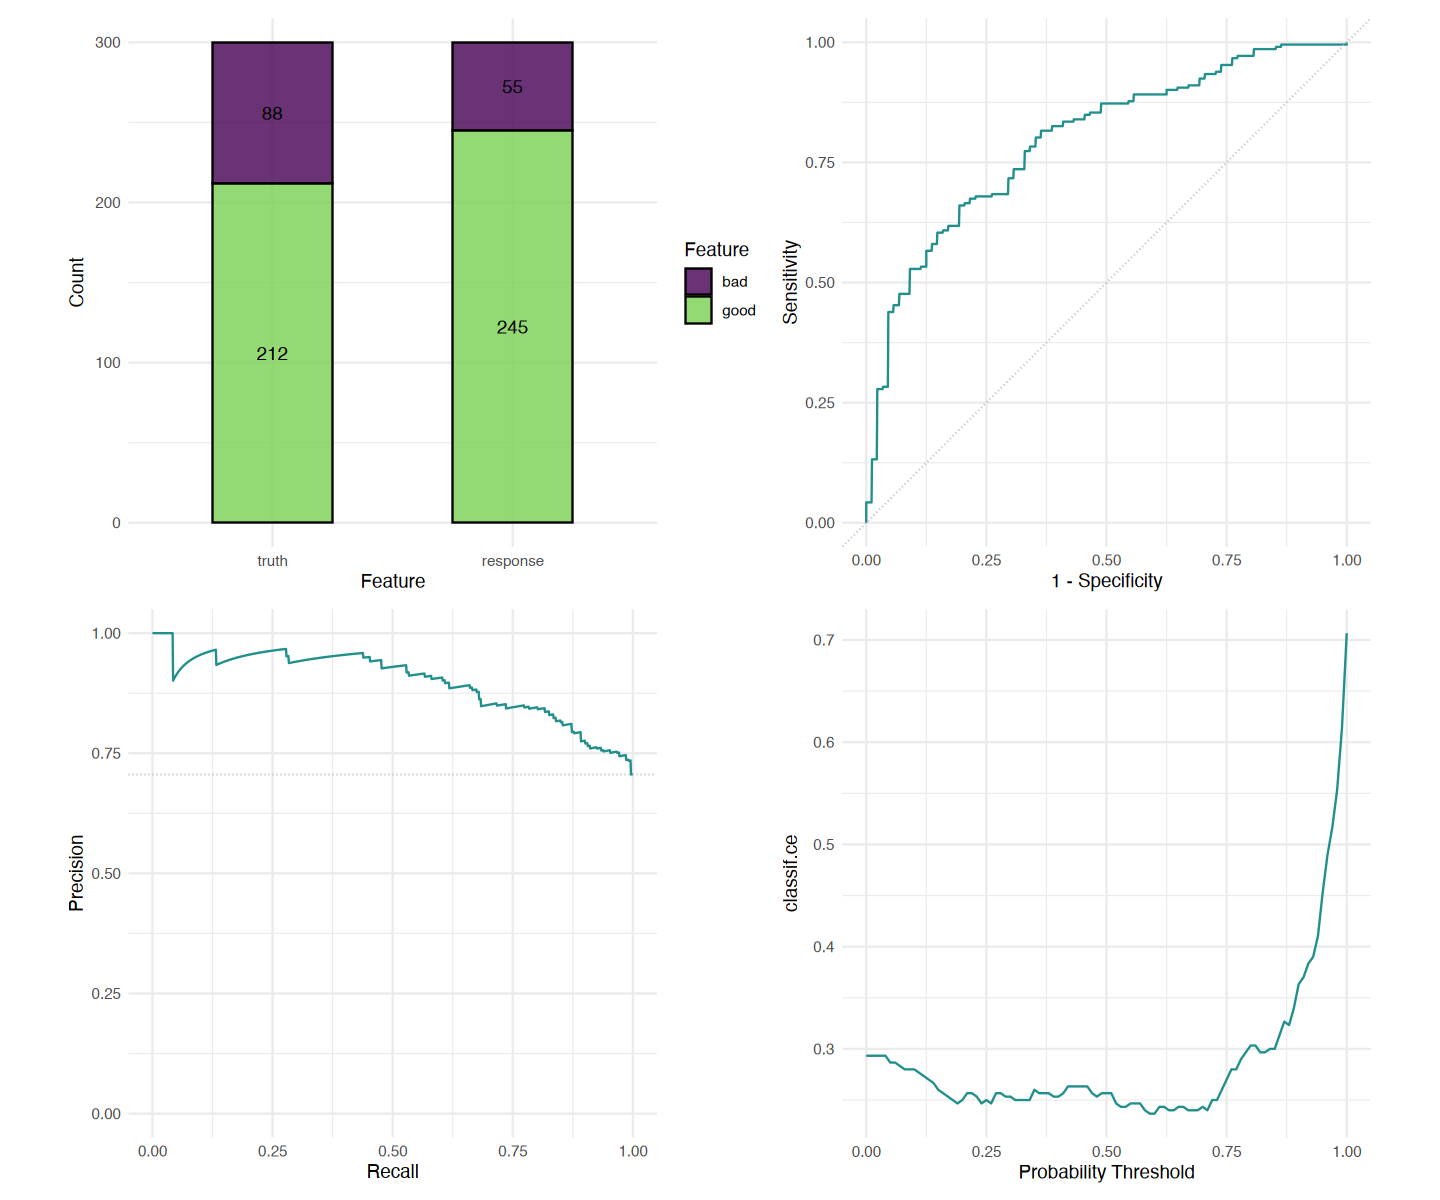

In [102]:
# 画图
p_stack <- autoplot(pred_lightgbm, type = "stacked")
p_roc <- autoplot(pred_lightgbm, type = "roc")
p_prc <- autoplot(pred_lightgbm, type = "prc")
p_thres <- autoplot(pred_lightgbm, type = "threshold")

# 修改画布大小
options(repr.plot.width = 12, repr.plot.height = 10)

# 拼图
library(patchwork)
p_stack + p_roc + p_prc + p_thres +
  plot_layout(ncol = 2)

# CatBoost

In [107]:
lrn_catboost 

<LearnerClassifCatboost:classif.catboost>: Gradient Boosting
* Model: -
* Parameters: loss_function_twoclass=Logloss,
  loss_function_multiclass=MultiClass, thread_count=1,
  logging_level=Silent, allow_writing_files=FALSE, save_snapshot=FALSE
* Validate: NULL
* Packages: mlr3, mlr3extralearners, catboost
* Predict Types:  response, [prob]
* Feature Types: numeric, factor, ordered
* Properties: importance, internal_tuning, missings, multiclass,
  twoclass, validation, weights

In [112]:
tsk_german$data

function (rows = NULL, cols = NULL, data_format, ordered = FALSE) 
.__Task__data(self = self, private = private, super = super, 
    rows = rows, cols = cols, data_format = data_format, ordered = ordered)
<environment: 0x31406cc28>

In [113]:
# 定义任务
tsk_german <- tsk("german_credit")

# catboost要求输入数据不能有int，我们转化为double
data_german <- tsk_german$data() %>%
  mutate(across(where(is.integer), as.double))

# 重构任务
tsk_german <- as_task_classif(
  data_german,
  target = "credit_risk",
  id = "german_credit"
)

# 定义学习器
lrn_catboost <- lrn("classif.catboost", predict_type = "prob")

# 训练
lrn_catboost$train(tsk_german)

# 预测
pred_catboost <- lrn_catboost$predict(tsk_german)

# 评估
pred_catboost$score(msr("classif.acc"))

classif.acc 
      0.875

## 调参

In [ ]:
lrn_catboost$param_set %>%
  as.data.table() %>%
  select(id, class, lower, upper, default) %>%
  print()

# id    class  lower upper        default
#                             <char>   <char>  <num> <num>         <list>
#  1:         loss_function_twoclass ParamFct     NA    NA        Logloss
#  2:       loss_function_multiclass ParamFct     NA    NA     MultiClass
#  3:                  learning_rate ParamDbl  0.001     1           0.03
#  4:                    random_seed ParamInt  0.000   Inf              0
#  5:                    l2_leaf_reg ParamDbl  0.000   Inf              3
#  6:                 bootstrap_type ParamFct     NA    NA <NoDefault[0]>
#  7:            bagging_temperature ParamDbl  0.000   Inf              1
#  8:                      subsample ParamDbl  0.000     1 <NoDefault[0]>
#  9:             sampling_frequency ParamFct     NA    NA   PerTreeLevel
# 10:                  sampling_unit ParamFct     NA    NA         Object
# 11:                        mvs_reg ParamDbl  0.000   Inf <NoDefault[0]>
# 12:                random_strength ParamDbl  0.000   Inf              1
# 13:                          depth ParamInt  1.000    16              6
# 14:                    grow_policy ParamFct     NA    NA  SymmetricTree
# 15:               min_data_in_leaf ParamInt  1.000   Inf              1
# 16:                     max_leaves ParamInt  1.000   Inf             31
# 17:               ignored_features ParamUty     NA    NA         [NULL]
# 18:               one_hot_max_size ParamUty     NA    NA          FALSE
# 19:                       has_time ParamLgl     NA    NA          FALSE
# 20:                            rsm ParamDbl  0.001     1              1
# 21:                       nan_mode ParamFct     NA    NA            Min
# 22:         fold_permutation_block ParamInt  1.000   256 <NoDefault[0]>
# 23:         leaf_estimation_method ParamFct     NA    NA <NoDefault[0]>
# 24:     leaf_estimation_iterations ParamInt  1.000   Inf <NoDefault[0]>
# 25:   leaf_estimation_backtracking ParamFct     NA    NA AnyImprovement
# 26:            fold_len_multiplier ParamDbl  1.001   Inf              2
# 27:         approx_on_full_history ParamLgl     NA    NA           TRUE
# 28:                  class_weights ParamUty     NA    NA <NoDefault[0]>
# 29:             auto_class_weights ParamFct     NA    NA           None
# 30:                  boosting_type ParamFct     NA    NA <NoDefault[0]>
# 31:             boost_from_average ParamLgl     NA    NA <NoDefault[0]>
# 32:                       langevin ParamLgl     NA    NA          FALSE
# 33:          diffusion_temperature ParamDbl  0.000   Inf          10000
# 34:                 score_function ParamFct     NA    NA         Cosine
# 35:           monotone_constraints ParamUty     NA    NA <NoDefault[0]>
# 36:                feature_weights ParamUty     NA    NA <NoDefault[0]>
# 37:    first_feature_use_penalties ParamUty     NA    NA <NoDefault[0]>
# 38:          penalties_coefficient ParamDbl  0.000   Inf              1
# 39:   per_object_feature_penalties ParamUty     NA    NA <NoDefault[0]>
# 40:              model_shrink_rate ParamDbl   -Inf   Inf <NoDefault[0]>
# 41:              model_shrink_mode ParamFct     NA    NA <NoDefault[0]>
# 42:                  target_border ParamDbl   -Inf   Inf <NoDefault[0]>
# 43:                   border_count ParamInt  1.000 65535 <NoDefault[0]>
# 44:            feature_border_type ParamFct     NA    NA   GreedyLogSum
# 45: per_float_feature_quantization ParamUty     NA    NA <NoDefault[0]>
# 46:                  classes_count ParamInt  1.000   Inf <NoDefault[0]>
# 47:                   thread_count ParamInt -1.000   Inf              1
# 48:                      task_type ParamFct     NA    NA            CPU
# 49:                        devices ParamUty     NA    NA <NoDefault[0]>
# 50:                  logging_level ParamFct     NA    NA         Silent
# 51:                  metric_period ParamInt  1.000   Inf              1
# 52:                      train_dir ParamUty     NA    NA  catboost_info
# 53:                 model_size_reg ParamDbl  0.000     1            0.5
# 54:            allow_writing_files ParamLgl     NA    NA          FALSE
# 55:                  save_snapshot ParamLgl     NA    NA          FALSE
# 56:                  snapshot_file ParamUty     NA    NA <NoDefault[0]>
# 57:              snapshot_interval ParamInt  1.000   Inf            600
# 58:                     simple_ctr ParamUty     NA    NA <NoDefault[0]>
# 59:               combinations_ctr ParamUty     NA    NA <NoDefault[0]>
# 60:        ctr_target_border_count ParamInt  1.000   255 <NoDefault[0]>
# 61:            counter_calc_method ParamFct     NA    NA           Full
# 62:             max_ctr_complexity ParamInt  1.000   Inf <NoDefault[0]>
# 63:           ctr_leaf_count_limit ParamInt  1.000   Inf <NoDefault[0]>
# 64:           store_all_simple_ctr ParamLgl     NA    NA          FALSE
# 65:     final_ctr_computation_mode ParamFct     NA    NA        Default
# 66:                        verbose ParamLgl     NA    NA          FALSE
# 67:                    ntree_start ParamInt  0.000   Inf              0
# 68:                      ntree_end ParamInt  0.000   Inf              0
# 69:          early_stopping_rounds ParamInt  1.000   Inf <NoDefault[0]>
# 70:                    eval_metric ParamUty     NA    NA <NoDefault[0]>
# 71:                 use_best_model ParamLgl     NA    NA <NoDefault[0]>
# 72:                     iterations ParamInt  1.000   Inf           1000
#                                 id    class  lower upper        default

                                id    class  lower upper        default
                            <char>   <char>  <num> <num>         <list>
 1:         loss_function_twoclass ParamFct     NA    NA        Logloss
 2:       loss_function_multiclass ParamFct     NA    NA     MultiClass
 3:                  learning_rate ParamDbl  0.001     1           0.03
 4:                    random_seed ParamInt  0.000   Inf              0
 5:                    l2_leaf_reg ParamDbl  0.000   Inf              3
 6:                 bootstrap_type ParamFct     NA    NA <NoDefault[0]>
 7:            bagging_temperature ParamDbl  0.000   Inf              1
 8:                      subsample ParamDbl  0.000     1 <NoDefault[0]>
 9:             sampling_frequency ParamFct     NA    NA   PerTreeLevel
10:                  sampling_unit ParamFct     NA    NA         Object
11:                        mvs_reg ParamDbl  0.000   Inf <NoDefault[0]>
12:                random_strength ParamDbl  0.000   Inf        

In [115]:
# 定义任务
tsk_german <- tsk("german_credit")

# catboost要求输入数据不能有int，我们转化为double
data_german <- tsk_german$data() %>%
  mutate(across(where(is.integer), as.double))

# 重构任务
tsk_german <- as_task_classif(
  data_german,
  target = "credit_risk",
  id = "german_credit"
)

# 定义学习器
lrn_catboost <- lrn("classif.catboost", predict_type = "prob")

# 定义参数空间
ps_catboost <- ps(
  iterations = p_int(lower = 1, upper = 5000, tags = "budget"),
  learning_rate = p_dbl(lower = 0.001, upper = 1, logscale = TRUE),
  depth = p_int(lower = 1, upper = 16)
)

# 定义Hyperband调优器
tuner_catboost <- tnr("hyperband", eta = 2, repetitions = 1)

# 并行化
future::plan("multisession", workers = 4)

# 开始调参
instance_catboost <- tune(
  task = tsk_german,
  learner = lrn_catboost,
  resampling = rsmp("cv", folds = 3),
  measure = msr("classif.acc"),
  tuner = tuner_catboost,
  search_space = ps_catboost
)

In [ ]:
# 训练模型
lrn_catboost$train(tsk_german)

# 预测
pred_catboost <- lrn_catboost$predict(tsk_german)

# 评估
pred_catboost$score(msr("classif.acc"))

# classif.acc: 0.875

classif.acc 
      0.875

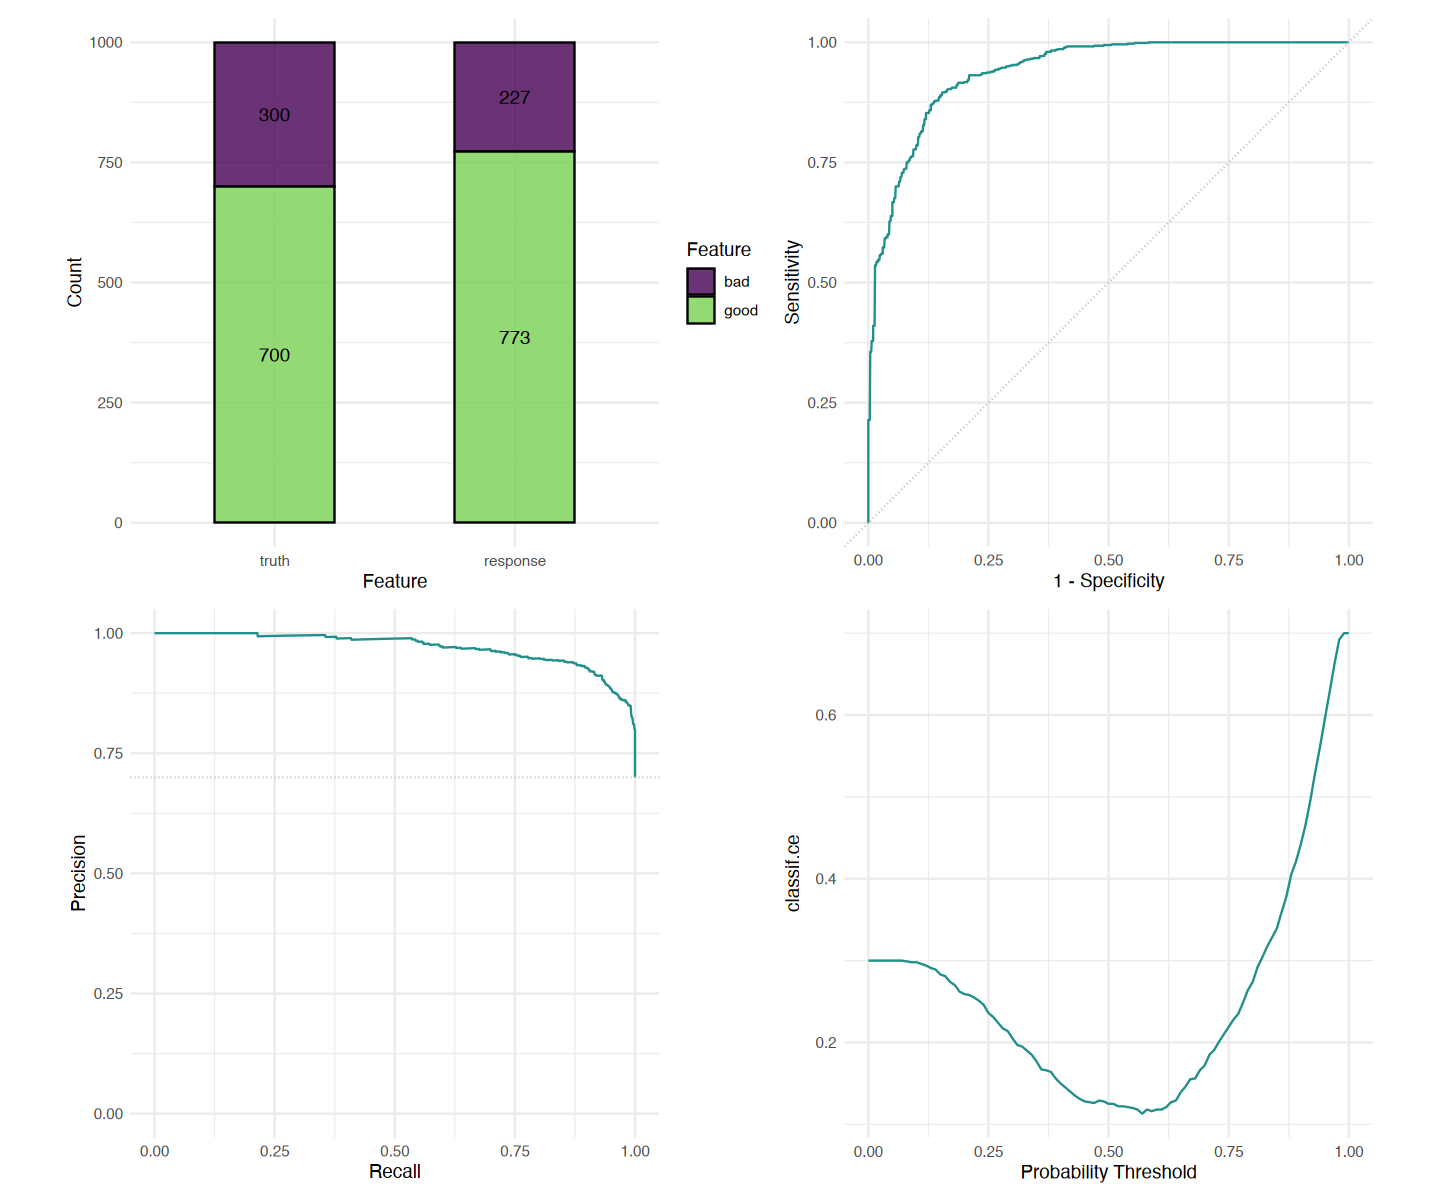

In [117]:
# 画图
p_stack <- autoplot(pred_catboost, type = "stacked")
p_roc <- autoplot(pred_catboost, type = "roc")
p_prc <- autoplot(pred_catboost, type = "prc")
p_thres <- autoplot(pred_catboost, type = "threshold")

# 修改画布大小
options(repr.plot.width = 12, repr.plot.height = 10)

# 拼图
library(patchwork)
p_stack + p_roc + p_prc + p_thres +
  plot_layout(ncol = 2)